## Frequency Domain Filter - Gaussian Filter

### Import Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Read Image and Convert to Grayscale

In [2]:
img_path = "./../lenna.jpeg"
img = plt.imread(img_path)

spatial_domain = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

### Convert Spatial Domain to Frequency Domain using `np.fft.fft2(gray)`

In [3]:
frequency_domain = np.fft.fft2(spatial_domain)

### Pass Low Frequecny Component to Middle or Center

In [4]:
frequency_domain_shifted = np.fft.fftshift(frequency_domain)

### Plot Frequency Domain Images

Text(0.5, 1.0, 'frequency_domain_shifted_abs')

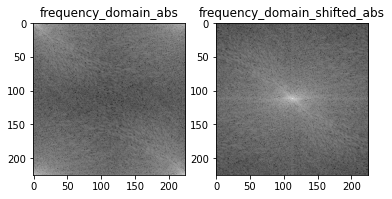

In [5]:
# first you need to take the absolute value of the 
# frequecny domain image

frequency_domain_abs = np.log1p(np.abs(frequency_domain))
frequency_domain_shifted_abs = np.log1p(np.abs(frequency_domain_shifted))

plt.subplot(1,2,1)
plt.imshow(frequency_domain_abs, cmap='gray')
plt.title("frequency_domain_abs")

plt.subplot(1,2,2)
plt.imshow(frequency_domain_shifted_abs, cmap='gray')
plt.title("frequency_domain_shifted_abs")

### Gaussian filter

There are two kinds of gaussian filter.

1. **Gaussian low pass filter** - use to making image blur or smooth
2. **Gaussian high pass filter** - use to making image sharpen

Now try to understand Gaussian low pass filter. Gaussian high pass filter is just (1 - low_pass_filter).

Equation:

```
H(u,v) = exp(-D^2(u,v) / 2*D_not^2)

Here,
   D_not => cut of frequency
    
Calculate D(u,v) from that we calculate D^2
    
D(u,v) = [(u - M/2) ^ 2 + (v - N/2) ^ 2] ^ .5
Here,
        D(u,v) = radius or distance from the center. 
```

For more understanding,

- **Low pass filter**: Low pass filter is the type of frequency domain filter that is used for smoothing the image. It attenuates the high frequency components and preserves the low frequency components. 

- **High pass filter**: High pass filter is the type of frequency domain filter that is used for sharpening the image. It attenuates the low frequency components and preserves the high frequency components. 

### Low Pass Filter

In [6]:
M, N = spatial_domain.shape       # M->Row, N->Col
H = np.zeros((M, N), dtype=np.float32)

# parameter D0 control the shape of our gaussian filter.

D0 = 10   # cut off frequency
for u in range(M):
    for v in range(N):
        D = np.sqrt((u - M/2) ** 2 + (v - N/2) ** 2)
        H[u, v] = np.exp((-D**2) / (2 * D0 * D0))

### Plot Gaussian Low Pass Filter

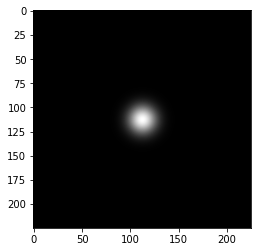

In [7]:
plt.imshow(H, cmap='gray')

### Image filter in Frequency Domain

In [8]:
G_shifted = frequency_domain_shifted * H

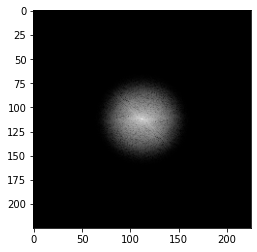

In [9]:
G_shifted_abs = np.log1p(np.abs(G_shifted))
plt.imshow(G_shifted_abs, cmap='gray')

### Inverse FFT

But before perform ifft we need to return back the low frequency to the corner

In [10]:
G = np.fft.ifftshift(G_shifted)

spital_domain_filtered = np.abs(np.fft.ifft2(G))

In [11]:
img_set = [spatial_domain, frequency_domain_shifted_abs, H, G_shifted_abs, spital_domain_filtered]

img_title = [
    'Spital Domain',
    "Frequency Domain Shifted",
    "Gaussian Lowpass Filter",
    "F_shifted * H",
    "Back to Spital Domain"
]

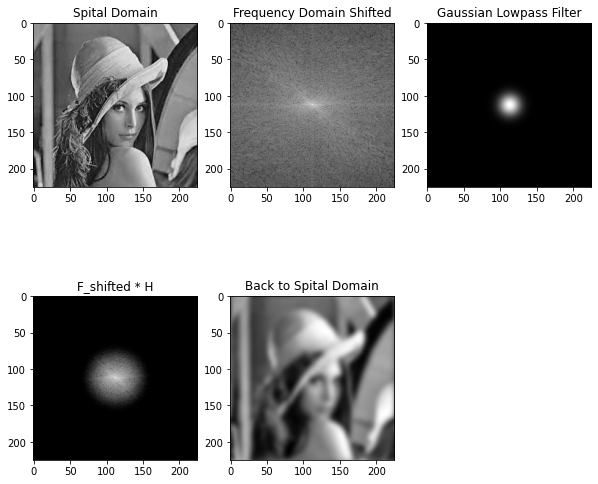

In [12]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=.01)
plt.tight_layout()

for i in range(len(img_set)):
    plt.subplot(2,3,i+1)
    plt.imshow(img_set[i], cmap='gray')
    plt.title(img_title[i])

#### High Pass Filter

In [13]:
HPF = 1 - H

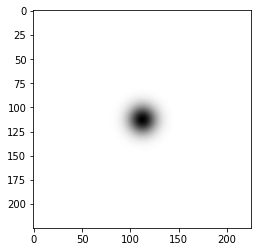

In [14]:
plt.imshow(HPF, cmap='gray')

In [15]:
G_shifted = frequency_domain_shifted * HPF
G_shifted_abs = np.log1p(np.abs(G_shifted))

In [16]:
G = np.fft.ifftshift(G_shifted)

spital_domain_filtered = np.abs(np.fft.ifft2(G))

In [17]:
img_set = [spatial_domain, frequency_domain_shifted_abs, HPF, G_shifted_abs, spital_domain_filtered]

img_title = [
    'Spital Domain',
    "Frequency Domain Shifted",
    "Gaussian Highpass Filter",
    "F_shifted * HPF",
    "Back to Spital Domain"
]

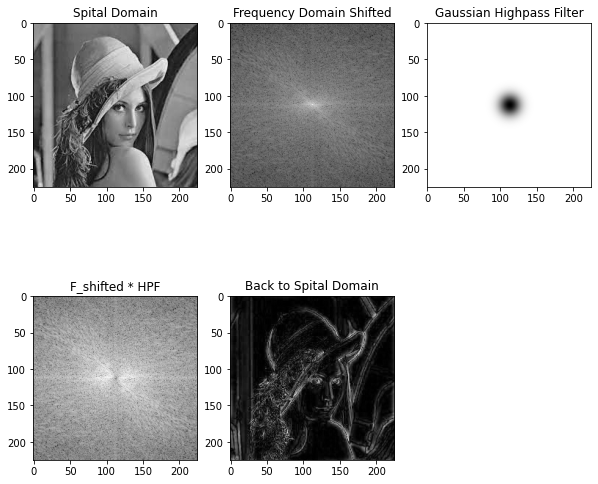

In [18]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=.01)
plt.tight_layout()

for i in range(len(img_set)):
    plt.subplot(2,3,i+1)
    plt.imshow(img_set[i], cmap='gray')
    plt.title(img_title[i])